<a href="https://colab.research.google.com/github/flaviod08/MiniProjetoDNC1/blob/main/Analise_dados_metereologicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Neste script iremos trabalhar com a análise estatística de dados metereológicos dos meses de Jan/Fev/2021 do município de Manaus - AM



In [ ]:
pip install pivottablejs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import scipy as sc
import seaborn as sns
from scipy.stats import normaltest


In [ ]:
# Abrindo o arquivo 
df = pd.read_csv('/content/INMET_MANAUS_JaneFev.CSV', sep =';')
df.head(2)

,Data,precipitacao(mm),Patm,RADIACAO GLOBAL,TEMP_AR,TEMP.PTO,TEMP_Max,TEMP_ORVALHO_MAX,TEMP_ORVALHO_MIN(°C),UMIDADE_REL_MAX(%),UMIDADE_REL_MIN(%),UMIDADE_REL_DO_AR(%),VENTO_DIRECA_HORARIA,VENTO_RAJADA_MAX(m/s),VENTO_VELOCIDADE(m/s)
0,01/01/2021,0.0,1002.5,0.0,28.4,23.2,29.0,23.2,22.3,73,67,73,84,3.4,1.6
1,01/01/2021,0.0,1003.3,0.0,27.7,23.6,28.5,23.6,23.2,79,73,79,68,3.4,1.2


In [ ]:
from pivottablejs import pivot_ui
pivot_ui(df)
pivot_ui(df, rows=['TEMP_AR'], cols=['UMIDADE_REL_DO_AR(%)'])

In [ ]:
# identificação dos tipos de variaveis
df.dtypes

Data                      object
precipitacao(mm)         float64
Patm                     float64
RADIACAO GLOBAL          float64
TEMP_AR                  float64
TEMP.PTO                 float64
TEMP_Max                 float64
TEMP_ORVALHO_MAX         float64
TEMP_ORVALHO_MIN(°C)     float64
UMIDADE_REL_MAX(%)         int64
UMIDADE_REL_MIN(%)         int64
UMIDADE_REL_DO_AR(%)       int64
VENTO_DIRECA_HORARIA       int64
VENTO_RAJADA_MAX(m/s)    float64
VENTO_VELOCIDADE(m/s)    float64
dtype: object

In [ ]:
# Dando nome a variavel principal para facilitar o manuseio da mesma
temperatura = df['TEMP_AR']
temperatura

0       28.4
1       27.7
2       27.7
3       27.1
4       26.2
        ... 
1215    27.5
1216    27.1
1217    26.7
1218    26.1
1219    25.6
Name: TEMP_AR, Length: 1220, dtype: float64

In [ ]:
#Descrição estatística dos dados
analise_est = df.describe()
analise_est 

,precipitacao(mm),Patm,RADIACAO GLOBAL,TEMP_AR,TEMP.PTO,TEMP_Max,TEMP_ORVALHO_MAX,TEMP_ORVALHO_MIN(°C),UMIDADE_REL_MAX(%),UMIDADE_REL_MIN(%),UMIDADE_REL_DO_AR(%),VENTO_DIRECA_HORARIA,VENTO_RAJADA_MAX(m/s),VENTO_VELOCIDADE(m/s)
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,0.546393,1003.571721,523.442377,26.277213,22.797869,26.782295,23.261639,22.386148,84.872131,79.531148,82.231967,122.394262,3.552951,1.199426
std,2.555577,1.859740,810.762435,2.336929,0.854643,2.579527,0.819704,0.947453,10.257555,12.989420,11.711299,99.379211,1.895982,0.737949
min,0.000000,998.100000,0.000000,21.900000,19.700000,22.100000,20.500000,19.000000,52.000000,44.000000,47.000000,1.000000,0.500000,0.100000
25%,0.000000,1002.200000,0.000000,24.500000,22.300000,24.800000,22.700000,21.800000,79.000000,70.000000,74.000000,54.000000,2.000000,0.600000
50%,0.000000,1003.600000,18.550000,25.700000,22.900000,26.100000,23.300000,22.500000,88.000000,83.000000,86.000000,77.000000,3.300000,1.050000
75%,0.000000,1004.800000,855.600000,27.700000,23.400000,28.525000,23.800000,23.000000,93.000000,90.000000,92.000000,194.000000,4.700000,1.600000
max,34.600000,1009.500000,3806.200000,33.400000,25.100000,33.900000,26.200000,24.900000,96.000000,95.000000,95.000000,359.000000,14.900000,4.500000


In [ ]:
#Obter Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data                   1220 non-null   object 
 1   precipitacao(mm)       1220 non-null   float64
 2   Patm                   1220 non-null   float64
 3   RADIACAO GLOBAL        1220 non-null   float64
 4   TEMP_AR                1220 non-null   float64
 5   TEMP.PTO               1220 non-null   float64
 6   TEMP_Max               1220 non-null   float64
 7   TEMP_ORVALHO_MAX       1220 non-null   float64
 8   TEMP_ORVALHO_MIN(°C)   1220 non-null   float64
 9   UMIDADE_REL_MAX(%)     1220 non-null   int64  
 10  UMIDADE_REL_MIN(%)     1220 non-null   int64  
 11  UMIDADE_REL_DO_AR(%)   1220 non-null   int64  
 12  VENTO_DIRECA_HORARIA   1220 non-null   int64  
 13  VENTO_RAJADA_MAX(m/s)  1220 non-null   float64
 14  VENTO_VELOCIDADE(m/s)  1220 non-null   float64
dtypes: f

In [ ]:
#Checando os dados
df.shape

(1220, 15)

In [ ]:
# Identificando a temperatura máxima
temp_max = max(temperatura)

print(temp_max)

33.4


In [ ]:
# Identificando a temperatura minima
temp_min = min(temperatura)
print(temp_min)

21.9


In [ ]:
# Calculando a amplitude
amplitude = max(temperatura)-min(temperatura)
print(amplitude)



11.5


In [ ]:
# Calculando a média
media_temp = np.mean(temperatura) 
print(media_temp)

26.277213114754097


In [ ]:
# Calculando a mediana
mediana_temp = np.median(temperatura)
print(mediana_temp)

25.7


In [ ]:
# Calculando a moda
moda_temp = temperatura.mode()
print(moda_temp) 

0    24.2
1    25.1
dtype: float64


In [ ]:
 # Calculando a variância
var_temp = np.var(temperatura)
print(var_temp)

5.45675944638538


In [ ]:
 # calculando o desvio padrão
desv_temp = np.std(temperatura)
print(desv_temp)


2.3359707717318257


In [ ]:
alpha = 0.05 
k2, p = normaltest(df['TEMP_AR'])


#Hipotese nula: Os dados seguem distribuição normal 
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
  print("A Hipótese Nula pode ser rejeitada, portanto o p-valor é  significativo α = 5%")
else:
  print("A hipótese nula não pode ser rejeitada, portanto o p-valor é não significativos α = 5%")

A Hipótese Nula pode ser rejeitada, portanto o p-valor é  significativo α = 5%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


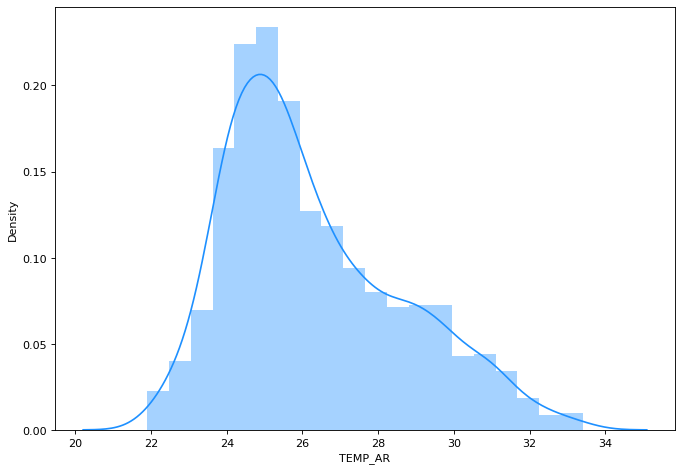

A Hipótese Nula pode ser rejeitada


In [ ]:
#Plotando o Histograma de Frequências
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df['TEMP_AR'], color="dodgerblue", label="Compact",)
plt.show()
#Fazendo o Teste de Normalidade
alpha = 0.05
k2, p = normaltest(df['TEMP_AR'])
#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal
if p < alpha:
 print("A Hipótese Nula pode ser rejeitada")
else:
 print("A hipótese nula não pode ser rejeitada")

In [ ]:
#resumo do modelo

X = df['TEMP_AR']
y = df['UMIDADE_REL_DO_AR(%)']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit() 
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     UMIDADE_REL_DO_AR(%)   R-squared:                       0.901
Model:                              OLS   Adj. R-squared:                  0.901
Method:                   Least Squares   F-statistic:                 1.104e+04
Date:                  Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                          03:50:15   Log-Likelihood:                -3324.2
No. Observations:                  1220   AIC:                             6652.
Df Residuals:                      1218   BIC:                             6663.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.2020      1.194

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


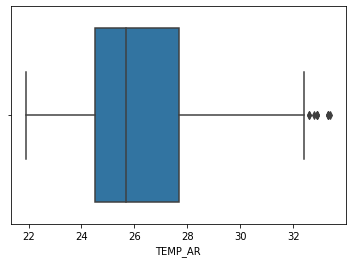

In [ ]:
# Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, e para procurar por outliers. 
# Por padrão, um boxplot demonstra a mediana, os quartis, o intervalo interquartil(IQR) e outliers para cada variável.

sns.boxplot(x=df["TEMP_AR"])

In [ ]:
#IRQ = Variação interquartil
#Identificar primeiro quartil
q1 = np.percentile(temperatura,25)
q1

24.5

In [ ]:
#Identificar terceiro quartil
q3 = np.percentile(temperatura,75)
q3

27.7

In [ ]:
#calculando o IQR
iqr = q3-q1
iqr

3.1999999999999993

In [ ]:
#calculando a linha de corte
corte = iqr*1.5
corte

4.799999999999999

In [ ]:
#Calcular os extremos 
ext_menor = q1 - corte
ext_maior = q3 + corte

In [ ]:
#Indentificar os valores que são outliers
outliers = temperatura[(temperatura<ext_menor) | (temperatura>ext_maior)].index
outliers

Int64Index([293, 294, 687, 688, 709, 973, 997, 1016, 1018, 1019], dtype='int64')

In [ ]:
#Remover outliers
tirar_outliers = temperatura.drop(outliers)
tirar_outliers

0       28.4
1       27.7
2       27.7
3       27.1
4       26.2
        ... 
1215    27.5
1216    27.1
1217    26.7
1218    26.1
1219    25.6
Name: TEMP_AR, Length: 1210, dtype: float64

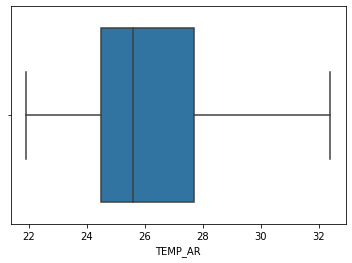

In [ ]:
sns.boxplot(x=tirar_outliers)

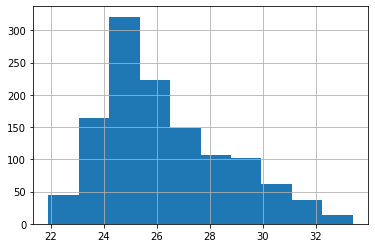

In [ ]:
# 1º Prática - Elaborar o histograma
temperatura.hist()

Text(0, 0.5, 'Frequência')

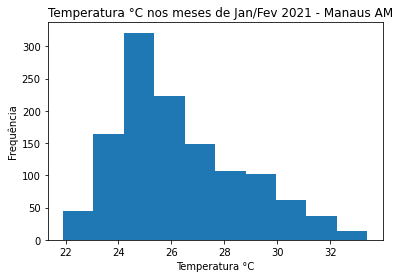

In [ ]:
# Cria uma imagem vazia
fig = plt.figure() #matplotlib cria uma imagem vazia

# Plota o histograma
plt.hist(temperatura, bins = 10) #s1 será o primeiro arquivo lido

# Coloca título nos eixos
plt.title("Temperatura °C nos meses de Jan/Fev 2021 - Manaus AM", loc = 'left')

# Coloca nome nos eixos
plt.xlabel('Temperatura °C')
plt.ylabel('Frequência')

In [ ]:
# Cria uma imagem vazia
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

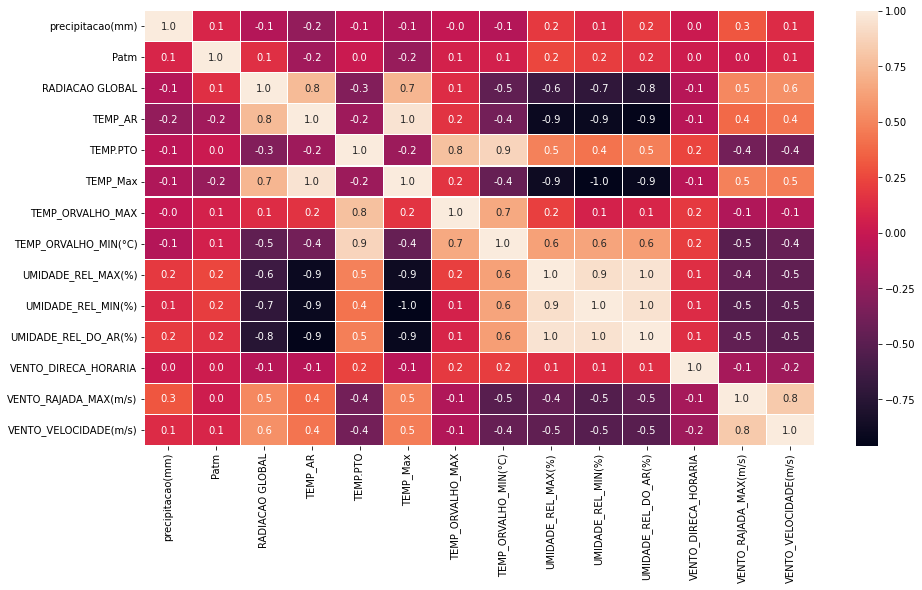

In [ ]:
###correlação -> com a correlação é possível entender como os dados se correlacionam entre si, 
# sendo quanto mais próximo de 1 mais correlaciondos, e -1 menos se relacionam

correlation = df.corr()
plt.figure(figsize = (15,8))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.10)

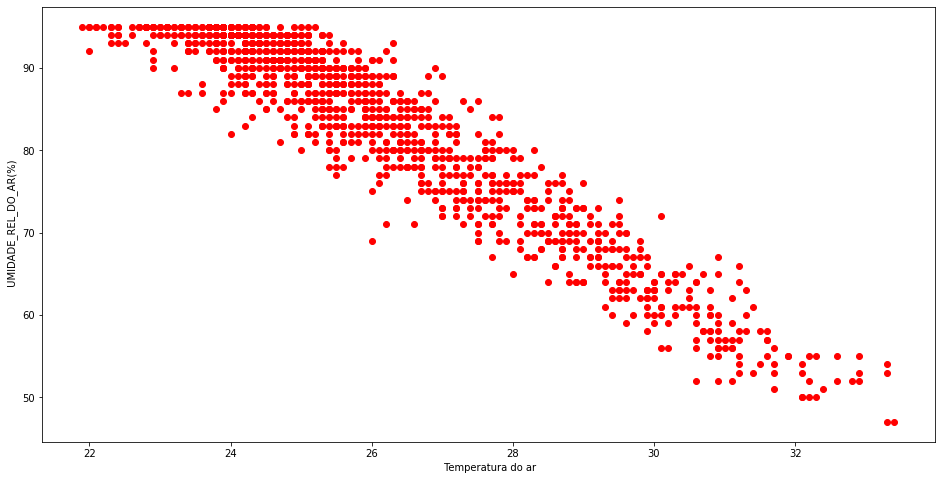

O modelo é: TEMP_AR = 207.2 + -4.7558X


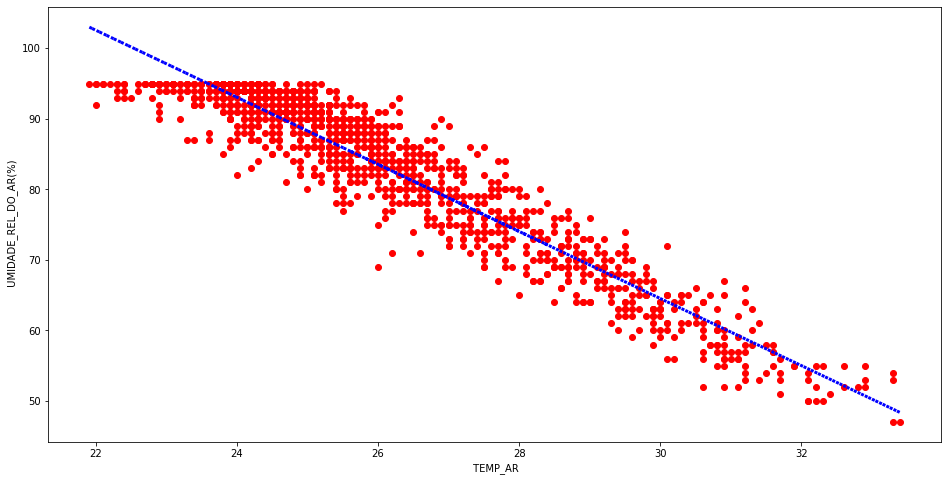

In [ ]:
#removendo os dados nulos ou fatantes

df.dropna(subset=['TEMP_AR'], inplace=True) 
df.dropna(subset=['UMIDADE_REL_DO_AR(%)'], inplace=True)

#plotando a relação entre a temperatura do ar e umidade relativa do ar


plt.figure(figsize = (16,8))
plt.scatter( 
    df['TEMP_AR'],
    df['UMIDADE_REL_DO_AR(%)'], 
    c='red')
plt.xlabel(" Temperatura do ar")
plt.ylabel(" UMIDADE_REL_DO_AR(%)") 
plt.show()

X = df['TEMP_AR'].values.reshape(-1,1) 
y = df['UMIDADE_REL_DO_AR(%)'].values.reshape(-1,1)

#gerando o modelo matemático da regressão linear simples
reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Temperatura °C = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

#Plotando a linha do modelo matemático em cima do grafico

f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8)) 
plt.scatter( 
    df['TEMP_AR'], 
    df['UMIDADE_REL_DO_AR(%)'], 
    c='red')

plt.plot( 
    df['TEMP_AR'], 
    f_previsaoes, 
    c='blue', 
    linewidth=3, 
    linestyle=':' 
)

plt.xlabel(" TEMPERATURA °c") 
plt.ylabel(" UMIDADE RELATIVA DO AR (%)") 
plt.show()

